# plot groundwater level

In [1]:
import numpy as np
import h5py as h5
import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime, timedelta
import pandas as pd
import ipdb

In [2]:
def batch_delta_to_time(origin, x, time_format, delta_format):
    y = []
    for ix in x:
        if delta_format == "hours":
            temp_y = origin + timedelta(hours=ix)
        elif delta_format == "days":
            temp_y = origin + timedelta(days=ix)
        elif delta_format == "minutes":
            temp_y = origin + timedelta(minutes=ix)
        elif delta_format == "weeks":
            temp_y = origin + timedelta(weeks=ix)
        elif delta_format == "seconds":
            temp_y = origin + timedelta(seconds=ix)
        elif delta_format == "microseconds":
            temp_y = origin + timedelta(microseconds=ix)
        elif delta_format == "milliseconds":
            temp_y = origin + timedelta(milliseconds=ix)
        else:
            print("Sorry, this naive program only solve single time unit")
        y.append(temp_y.strftime(time_format))
    y = np.asarray(y)
    return(y)

# I/O files

In [3]:
#input
model_dir = "/Users/shua784/Paraview/HFR/HFR_model_200x200x2_6h_bc/"
fname_model_origin = model_dir + "model_origin.txt"
fname_material_h5 = model_dir + "HFR_material_river.h5"
fname_pflotran_h5 = model_dir + "pflotran_200x200x2_6h_bc_test.h5"

data_dir = "/Users/shua784/Dropbox/PNNL/Projects/Reach_scale_model/data/"
fname_mass1_coord = data_dir + "MASS1/coordinates.csv"

#output
out_dir = "/Users/shua784/Dropbox/PNNL/Projects/Reach_scale_model/Outputs/HFR_model_200x200x2_6h_bc/"
fig_wl = out_dir + 'wl/'

# output_dir = "/Users/song884/remote/reach/Outputs/HFR_100x100x5_6h_bc/"
# fig_dir = "/Users/song884/remote/reach/figures/HFR_100x100x5_6h_bc/wl/"
# data_dir = "/Users/song884/remote/reach/data/"

In [4]:
date_origin = datetime.strptime("2007-03-28 12:00:00", "%Y-%m-%d %H:%M:%S")
model_origin = np.genfromtxt(
    fname_model_origin, delimiter=" ", skip_header=1)

## import mass1 coord

In [5]:
## read mass1 coordinates
section_coord = np.genfromtxt(
    fname_mass1_coord, delimiter=",", skip_header=1)
section_coord[:, 1] = section_coord[:, 1] - model_origin[0]
section_coord[:, 2] = section_coord[:, 2] - model_origin[1]
line1 = section_coord[0, 1:3] / 1000
line2 = section_coord[int(len(section_coord[:, 1]) / 2), 1:3] / 1000
line3 = section_coord[-1, 1:3] / 1000

line1_x = [line1[0]] * 2
line1_y = [line1[1] - 5, line1[1] + 5]
line2_x = [line2[0] - 5, line2[0] + 5]
line2_y = [line2[1]] * 2
line3_x = [line3[0] - 5, line3[0] + 5]
line3_y = [line3[1]] * 2

In [6]:
# # print group names
# for name in material_h5:
#     print(name)

# print both group and its member names
def printname(name):
    print(name)

In [18]:
all_h5 = glob.glob(fname_pflotran_h5) # find all "pflotran*.h5" files
all_h5 = np.sort(all_h5)

input_h5 = h5.File(all_h5[0], "r")
groups = list(input_h5.keys()) # create a list with group names
time_index = [s for s, s in enumerate(groups) if "Time:" in s] # enumerate returns its index (index, string)
list(input_h5.keys())

['Coordinates',
 'Provenance',
 'Time:  3.24000E+04 h',
 'Time:  3.25200E+04 h',
 'Time:  3.26400E+04 h',
 'Time:  3.27600E+04 h',
 'Time:  3.28800E+04 h',
 'Time:  3.30000E+04 h',
 'Time:  3.31200E+04 h',
 'Time:  3.32400E+04 h',
 'Time:  3.33600E+04 h',
 'Time:  3.34800E+04 h',
 'Time:  3.36000E+04 h',
 'Time:  3.37200E+04 h',
 'Time:  3.38400E+04 h',
 'Time:  3.39600E+04 h',
 'Time:  3.40800E+04 h',
 'Time:  3.42000E+04 h',
 'Time:  3.43200E+04 h',
 'Time:  3.44400E+04 h',
 'Time:  3.45600E+04 h',
 'Time:  3.46800E+04 h',
 'Time:  3.48000E+04 h',
 'Time:  3.49200E+04 h',
 'Time:  3.50400E+04 h',
 'Time:  3.51600E+04 h',
 'Time:  3.52800E+04 h',
 'Time:  3.54000E+04 h',
 'Time:  3.55200E+04 h',
 'Time:  3.56400E+04 h',
 'Time:  3.57600E+04 h',
 'Time:  3.58800E+04 h',
 'Time:  3.60000E+04 h',
 'Time:  3.61200E+04 h',
 'Time:  3.62400E+04 h',
 'Time:  3.63600E+04 h',
 'Time:  3.64800E+04 h',
 'Time:  3.66000E+04 h',
 'Time:  3.67200E+04 h',
 'Time:  3.68400E+04 h',
 'Time:  3.69600E+0

In [32]:
real_itime = [str(batch_delta_to_time(date_origin, [float(itime[7:18])], "%Y-%m-%d %H:%M:%S", "hours")[0])
              for itime in time_index]

real_itime

['2010-12-07 12:00:00',
 '2010-12-12 12:00:00',
 '2010-12-17 12:00:00',
 '2010-12-22 12:00:00',
 '2010-12-27 12:00:00',
 '2011-01-01 12:00:00',
 '2011-01-06 12:00:00',
 '2011-01-11 12:00:00',
 '2011-01-16 12:00:00',
 '2011-01-21 12:00:00',
 '2011-01-26 12:00:00',
 '2011-01-31 12:00:00',
 '2011-02-05 12:00:00',
 '2011-02-10 12:00:00',
 '2011-02-15 12:00:00',
 '2011-02-20 12:00:00',
 '2011-02-25 12:00:00',
 '2011-03-02 12:00:00',
 '2011-03-07 12:00:00',
 '2011-03-12 12:00:00',
 '2011-03-17 12:00:00',
 '2011-03-22 12:00:00',
 '2011-03-27 12:00:00',
 '2011-04-01 12:00:00',
 '2011-04-06 12:00:00',
 '2011-04-11 12:00:00',
 '2011-04-16 12:00:00',
 '2011-04-21 12:00:00',
 '2011-04-26 12:00:00',
 '2011-05-01 12:00:00',
 '2011-05-06 12:00:00',
 '2011-05-11 12:00:00',
 '2011-05-16 12:00:00',
 '2011-05-21 12:00:00',
 '2011-05-26 12:00:00',
 '2011-05-31 12:00:00',
 '2011-06-05 12:00:00',
 '2011-06-10 12:00:00',
 '2011-06-15 12:00:00',
 '2011-06-20 12:00:00',
 '2011-06-25 12:00:00',
 '2011-06-30 12:

In [8]:
x_grids = list(input_h5["Coordinates"]['X [m]'])
y_grids = list(input_h5["Coordinates"]['Y [m]'])
z_grids = list(input_h5["Coordinates"]['Z [m]'])
input_h5.close()

dx = np.diff(x_grids)
dy = np.diff(y_grids)
dz = np.diff(z_grids)

nx = len(dx)
ny = len(dy)
nz = len(dz)

# x,y,z coordinates at cell center
x = x_grids[0] + np.cumsum(dx) - 0.5 * dx[0]
y = y_grids[0] + np.cumsum(dy) - 0.5 * dy[0]
z = z_grids[0] + np.cumsum(dz) - 0.5 * dz[0]

# create grids--a list of arrays based nx, ny, nz
grids = np.asarray([(x, y, z) for z in range(nz)
                    for y in range(ny) for x in range(nx)])

## import material.h5

In [6]:
    
# open file for reading
material_h5 = h5.File(fname_material_h5, "r") 
# material_h5.visit(printname)
list(material_h5.keys())

['Materials', 'Regions']

In [9]:
# open file for reading
# material_h5 = h5.File(fname_material_h5, "r") 
# read river cell ids
river_cells = []
for i_region in list(material_h5['Regions'].keys()):
    river_cells = np.append(river_cells, np.asarray(
        list(material_h5["Regions"][i_region]["Cell Ids"])))
river_cells = np.unique(river_cells).astype(int)
river_cells = river_cells - 1  # need minus 1 as python index started with 0
# label river cells in x-y plane with '1'
yx_river = np.asarray([np.nan] * (ny * nx)).reshape(ny, nx) # initialize ny*nx array with nan value
for icell in river_cells:
    yx_river[grids[icell, 1], grids[icell, 0]] = 1
    
material_h5.close()

# plot GW level contour

In [ ]:
%matplotlib inline 
# loop over pflotran*.h5 files
# for i_h5 in all_h5:
#     print(i_h5)
#     input_h5 = h5.File(i_h5, "r")

#     groups = list(input_h5.keys()) # create a list with group names
#     time_index = [s for s, s in enumerate(groups) if "Time:" in s] # enumerate returns its index (index, string)

Time:  3.24000E+04 h


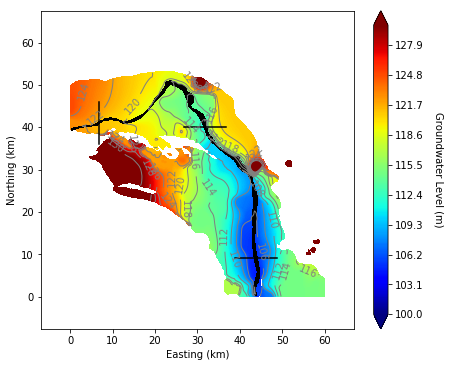

In [24]:
# loop over time step
for itime in time_index[:1]:

    print(itime)
    # initialize total head
    temp_wl = np.asarray([np.nan] * (ny * nx)).reshape(ny, nx)
    # read pressure
    temp_pressure = np.asarray(list(input_h5[itime]["Liquid_Pressure [Pa]"]))
    # convert p to head
    temp_head = (temp_pressure - 101325) / 997.16 / 9.8068
    for ix in range(nx):
        for iy in range(ny):
            positive_head_index = np.where(temp_head[ix, iy, :] > 0)[0] # take the first positive head
            if (len(positive_head_index) > 0): # if positive head exists, then caculate total head
                iz = positive_head_index[0]
                temp_wl[iy, ix] = temp_head[ix, iy, iz] + z[iz] # for contour plot, temp_wl must has shape of (ny, nx)

    real_itime = batch_delta_to_time(date_origin, [float(
        itime[7:18])], "%Y-%m-%d %H:%M:%S", "hours")
    real_itime = str(real_itime[0])
    
    ## plot gw contour
    fig_name = fig_wl + real_itime + ".png"
    gs = gridspec.GridSpec(1, 1)
    fig = plt.figure()
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(line1_x, line1_y, "black")
    ax1.plot(line2_x, line2_y, "black")
    ax1.plot(line3_x, line3_y, "black")
    cf1 = ax1.contourf(x / 1000, y / 1000, temp_wl,
                       cmap=plt.cm.jet,
                       levels=np.arange(100, 130.1, 0.1),
                       vmin=100,
                       vmax=130,
                       extend="both",
                       V=np.arange(100, 130.1, 5)
                       )
    cf2 = ax1.contour(x / 1000, y / 1000, temp_wl,
                      colors="grey",
                      levels=np.arange(100, 130.1, 2),
                      linewidths=1,
                      vmin=100,
                      vmax=130)
    plt.clabel(cf2, inline = True, fmt = '%3.0d', fontsize = 10)
    ax1.set_xlabel("Easting (km)")
    ax1.set_ylabel("Northing (km)")
    ax1.set_aspect("equal", "datalim")
    ax1.set_xlim([np.min(x_grids) / 1000, np.max(x_grids) / 1000])
    ax1.set_ylim([np.min(x_grids) / 1000, np.max(x_grids) / 1000])
    ax1.set_aspect("equal", "datalim")
    cb1 = plt.colorbar(cf1, extend="both")  # ,
    #                           orientation="horizontal", shrink=0.8, aspect=25)
    cb1.ax.set_ylabel("Groundwater Level (m)", rotation=270, labelpad=20)
    fig.tight_layout()
    cf3 = ax1.contourf(x / 1000, y / 1000, yx_river, colors="black")
    fig.set_size_inches(6.5, 5.5)

In [ ]:
    fig.savefig(fig_name, dpi=600, transparent=True)
    plt.close(fig)
    

# export gw data

In [35]:
for itime in time_index[151:157]:

    print(itime)
    # initialize total head
    temp_wl = np.asarray([np.nan] * (ny * nx)).reshape(ny, nx)
    # read pressure
    temp_pressure = np.asarray(list(input_h5[itime]["Liquid_Pressure [Pa]"]))
    # convert p to head
    temp_head = (temp_pressure - 101325) / 997.16 / 9.8068
    for ix in range(nx):
        for iy in range(ny):
            positive_head_index = np.where(temp_head[ix, iy, :] > 0)[0] # take the first positive head
            if (len(positive_head_index) > 0): # if positive head exists, then caculate total head
                iz = positive_head_index[0]
                temp_wl[iy, ix] = temp_head[ix, iy, iz] + z[iz]

    real_itime = batch_delta_to_time(date_origin, [float(
        itime[7:18])], "%Y-%m-%d %H:%M:%S", "hours")
    real_itime = str(real_itime[0])
    print(real_itime)
    
    np.savetxt(fig_wl + real_itime + '.csv', temp_wl, delimiter= ',')

Time:  5.05200E+04 h
Time:  5.06400E+04 h
Time:  5.07600E+04 h
Time:  5.08800E+04 h
Time:  5.10000E+04 h
Time:  5.11200E+04 h


In [12]:
input_h5.close()